In [1]:
import cv2
import numpy as np
import itertools
import mediapipe as mp
import os
import csv
import time

In [2]:
from utils.image_treatment import preprocess_mediapipe_landmarks

In [3]:
NEW_LABEL = 8  # 8 = INDEX_FRONT, 9 = PINKY_BACK
timestamp = time.strftime("%Y%m%d_%H%M%S")
SAVE_PATH = f"data/keypoint_extended_{NEW_LABEL}_{timestamp}.csv"

In [4]:
mp_hands = mp.solutions.hands
mp_draw = mp.solutions.drawing_utils

In [5]:
hands = mp_hands.Hands(static_image_mode=False, max_num_hands=1,
                       min_detection_confidence=0.7, min_tracking_confidence=0.5)

cap = cv2.VideoCapture(0)
print("Press 's' to save frame, 'q' to quit.")

saved_count = 0
with open(SAVE_PATH, mode='a', newline='') as f:
    writer = csv.writer(f)

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        h, w, _ = frame.shape
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        result = hands.process(frame_rgb)

        if result.multi_hand_landmarks:
            for hand_landmarks in result.multi_hand_landmarks:
                mp_draw.draw_landmarks(frame, hand_landmarks, mp_hands.HAND_CONNECTIONS)
                cv2.putText(frame, f'Label: {NEW_LABEL}', (10, 30),
                            cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

                # Enregistrement à la pression de 's'
                key = cv2.waitKey(1)
                if key & 0xFF == ord('s'):
                    vec = preprocess_mediapipe_landmarks(hand_landmarks, w, h)
                    row = [NEW_LABEL] + vec.tolist()
                    writer.writerow(row)
                    saved_count += 1
                    print(f"→ Frame enregistrée. Total: {saved_count}")

        cv2.imshow("Add Gesture Sample", frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()
hands.close()
print(f"✓ {saved_count} nouvelles lignes ajoutées dans {SAVE_PATH}")


Press 's' to save frame, 'q' to quit.
→ Frame enregistrée. Total: 1
→ Frame enregistrée. Total: 2
→ Frame enregistrée. Total: 3
→ Frame enregistrée. Total: 4
→ Frame enregistrée. Total: 5
→ Frame enregistrée. Total: 6
→ Frame enregistrée. Total: 7
→ Frame enregistrée. Total: 8
→ Frame enregistrée. Total: 9
→ Frame enregistrée. Total: 10
→ Frame enregistrée. Total: 11
→ Frame enregistrée. Total: 12
→ Frame enregistrée. Total: 13
→ Frame enregistrée. Total: 14
→ Frame enregistrée. Total: 15
→ Frame enregistrée. Total: 16
→ Frame enregistrée. Total: 17
→ Frame enregistrée. Total: 18
→ Frame enregistrée. Total: 19
→ Frame enregistrée. Total: 20
→ Frame enregistrée. Total: 21
→ Frame enregistrée. Total: 22
→ Frame enregistrée. Total: 23
→ Frame enregistrée. Total: 24
→ Frame enregistrée. Total: 25
→ Frame enregistrée. Total: 26
→ Frame enregistrée. Total: 27
→ Frame enregistrée. Total: 28
→ Frame enregistrée. Total: 29
→ Frame enregistrée. Total: 30
→ Frame enregistrée. Total: 31
→ Frame en

In [6]:
import pandas as pd
import glob

original_path = "data/keypoint.csv"  # ton dataset original
extended_paths = glob.glob("data/keypoint_extended*.csv")  # tous les fichiers ajoutés

df_main = pd.read_csv(original_path, header=None)
dfs_extended = [pd.read_csv(path, header=None) for path in extended_paths]

(array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int64), array([1595, 1663, 1510,  672,  164,  257,  139,  190], dtype=int64))


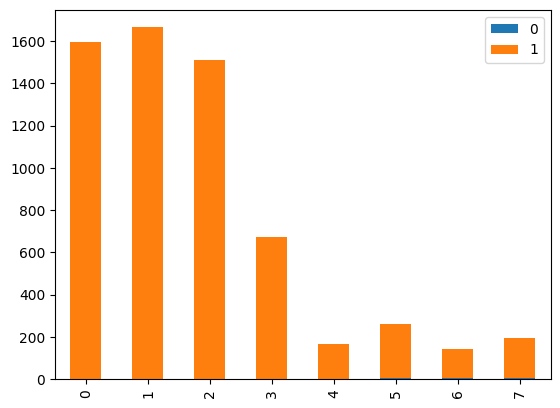

In [7]:
def print_label(df):
    labels = df.iloc[:, 0].values
    counts = np.unique(labels, return_counts=True)
    df = pd.DataFrame(counts)
    df.T.plot(kind="bar", stacked=True)
    print(counts)

print_label(df_main)

In [8]:
merged_df = pd.concat([df_main] + dfs_extended, ignore_index=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64), array([1595, 1663, 1510,  672,  164,  257,  139,  190, 2110,  724],
      dtype=int64))


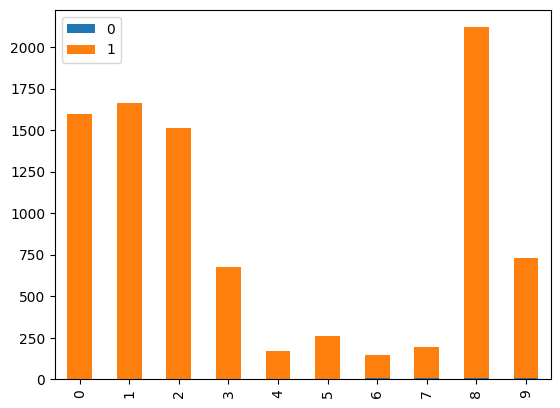

In [9]:
print_label(merged_df)

In [11]:
output_path = "data/keypoint_merged.csv"
merged_df.to_csv(output_path, index=False, header=False)

print(f"✅ Fichier fusionné sauvegardé sous : {output_path}")
print(f"→ Nombre total de lignes : {len(merged_df)}")
print(f"→ Labels présents : {sorted(merged_df[0].unique())}")

✅ Fichier fusionné sauvegardé sous : data/keypoint_merged.csv
→ Nombre total de lignes : 9024
→ Labels présents : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
